In [ ]:
# TODO: organize the plots better. Try to see if they can be organized into grids so they look better
# TODO: 

In [144]:
# Trevor McGlaflin and Sam Noel
# April 3, 2022
# Predicting Employee Churn
# CS/STAT 287

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [145]:
# define color pallette to be used in plots
blue_1 = '#003f5c'
blue_2 = '#2f4b7c'
purple_1 = '#665191'
purple_2 = '#a05195'
pink_1 = '#d45087'
pink_2 = '#f95d6a'
orange_1 = '#ff7c43'
orange_2 = '#ffa600'

In [193]:
# read in data
df = pd.read_csv('ChurnData.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [194]:
# Clean/Transform Data

# drop unneccesary columns
df.drop(columns=['Over18', 'StandardHours'])

# convert boolean fields into 0's and 1's
df['Attrition'] = np.where(df['Attrition'] == "Yes", 1, 0)
df['Gender'] = np.where(df['Gender'] == "Male", 1, 0)
df['OverTime'] = np.where(df['OverTime'] == "Yes", 1, 0)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [195]:
# Exploratory Data Analysis
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.600000,65.891156,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


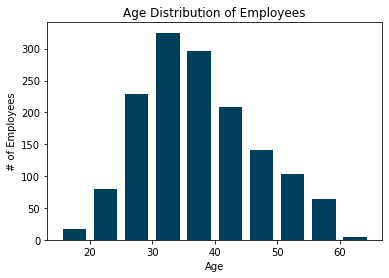

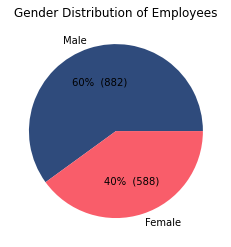

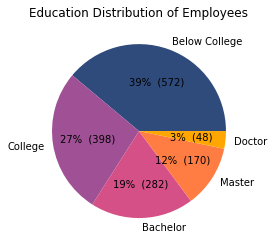

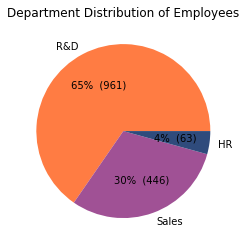

In [196]:
# Demographics
# Age Histogram (5 year buckets)
plt.hist(df['Age'], 
         bins=[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 65], 
         rwidth=0.75, 
         color=blue_1)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('# of Employees')
plt.show()

# Gender Pie Chart
def get_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(df['Gender'].value_counts(), 
        colors=[blue_2, pink_2], 
        labels=['Male', 'Female'], 
        autopct=get_autopct(df['Gender'].value_counts()))
plt.title('Gender Distribution of Employees')
plt.show()

# Education Pie Plot
plt.pie(df['Education'].value_counts(), 
        colors=[blue_2, purple_2, pink_1, orange_1, orange_2], 
        labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], 
        autopct=get_autopct(df['Education'].value_counts()))
plt.title('Education Distribution of Employees')
plt.show()



# Department Pie Plot 
plt.pie(df['Department'].value_counts(),   
        colors=[orange_1, purple_2, blue_2],
        labels=['R&D', 'Sales', 'HR'],
        autopct=get_autopct(df['Department'].value_counts()))
plt.title('Department Distribution of Employees')
plt.show()

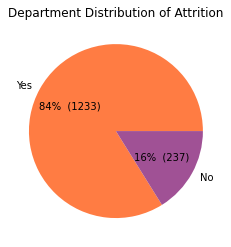

In [153]:
# Distribution of Attrition
plt.pie(df['Attrition'].value_counts(),   
        colors=[orange_1, purple_2],
        labels=['Yes','No'],
        autopct=get_autopct(df['Attrition'].value_counts()))
plt.title('Department Distribution of Attrition')
plt.show()

Text(0.5, 1.0, 'Demographics Correlation Matrix')

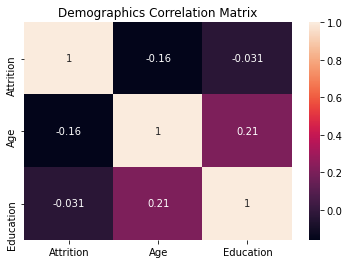

In [161]:
# Correlation Matrix for demographics with attrition
small_df = df[['Attrition', 'Age', 'Gender', 'Education']]
heat_map = sns.heatmap(small_df.corr(), annot=True)
heat_map.set_title("Demographics Correlation Matrix")

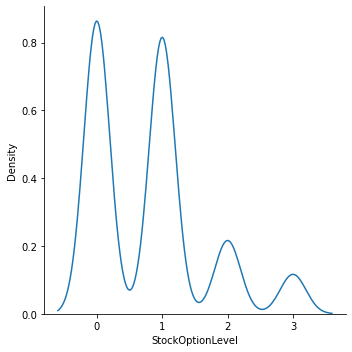

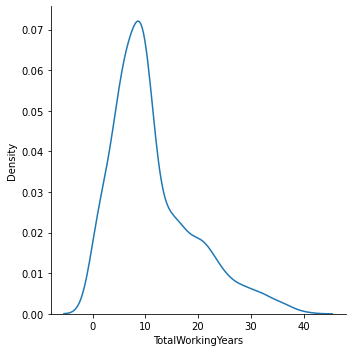

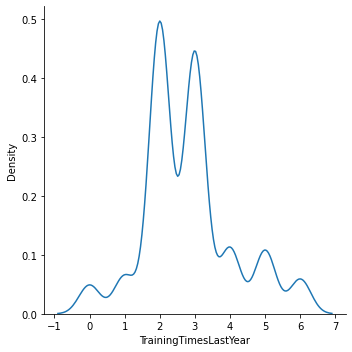

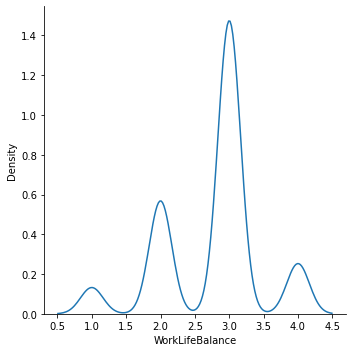

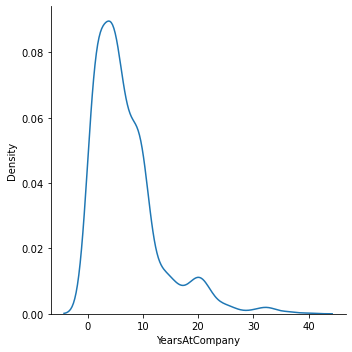

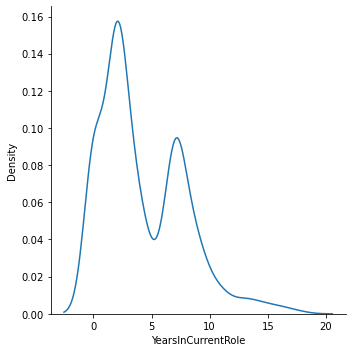

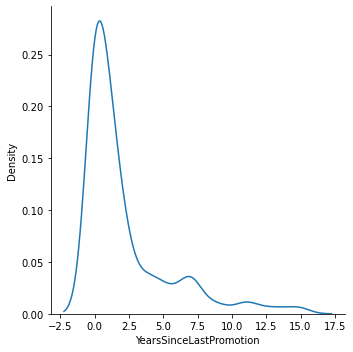

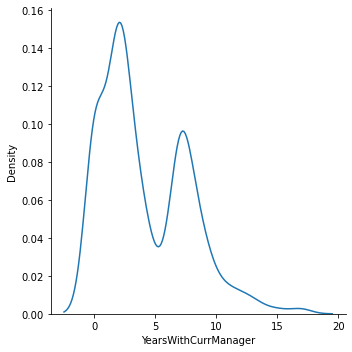

In [111]:
# Density Plots for Work Related Statistics
# StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager
sns.displot(df, x="StockOptionLevel", kind="kde")
sns.displot(df, x="TotalWorkingYears", kind="kde")
sns.displot(df, x="TrainingTimesLastYear", kind="kde")
sns.displot(df, x="WorkLifeBalance", kind="kde")
sns.displot(df, x="YearsAtCompany", kind="kde")
sns.displot(df, x="YearsInCurrentRole", kind="kde")
sns.displot(df, x="YearsSinceLastPromotion", kind="kde")
sns.displot(df, x="YearsWithCurrManager", kind="kde")

Text(0.5, 1.0, 'Work Related Statistics Correlation Matrix')

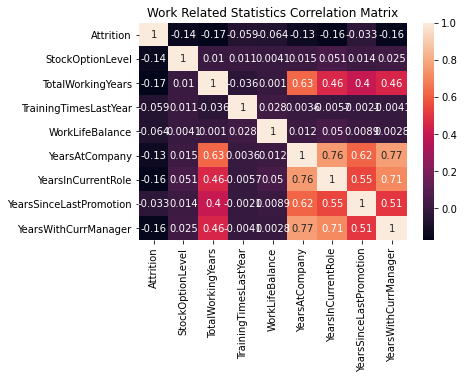

In [114]:
# Correlation Matrix for Work Related Statistics with attrition
small_df = df[['Attrition', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
heat_map = sns.heatmap(small_df.corr(), annot=True)
heat_map.set_title("Work Related Statistics Correlation Matrix")

In [ ]:
# Density Plots for Non-Work Related Statistics
sns.displot(df, x="StockOptionLevel", kind="kde")
sns.displot(df, x="TotalWorkingYears", kind="kde")
sns.displot(df, x="TrainingTimesLastYear", kind="kde")
sns.displot(df, x="WorkLifeBalance", kind="kde")
sns.displot(df, x="YearsAtCompany", kind="kde")

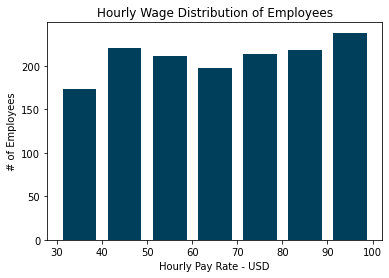

In [129]:
# Salary Analysis
# histogram
plt.hist(df['HourlyRate'],
         bins=[30, 40, 50, 60, 70, 80, 90, 100], 
         rwidth=0.75, 
         color=blue_1)
plt.title('Hourly Wage Distribution of Employees')
plt.xlabel('Hourly Pay Rate - USD')
plt.ylabel('# of Employees')
plt.show()

In [184]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,41,0,1102,1,2,1,1,2,0,94,...,0,0,0,0,1,0,0,0,1,1
1,49,0,279,8,1,1,2,3,0,61,...,0,0,0,1,0,0,0,1,0,1
2,37,0,1373,2,2,1,4,4,0,92,...,0,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,1,0,0,0,1,0,1
4,27,0,591,2,1,1,7,1,0,40,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,0,41,...,0,0,0,0,0,0,0,1,0,1
1466,39,0,613,6,1,1,2062,4,0,42,...,0,0,0,0,0,0,0,1,0,1
1467,27,0,155,4,3,1,2064,2,0,87,...,0,1,0,0,0,0,0,1,0,1
1468,49,0,1023,2,3,1,2065,4,0,63,...,0,0,0,0,1,0,0,1,0,1


In [200]:
# Begin Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Before doing the machine learning we prepare the data
# first we need to make dummy variables for all of our categorical variables
df = pd.get_dummies(df)

# now we must split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Attrition'], 
                                                    df['Attrition'], 
                                                    test_size=0.33, 
                                                    random_state=42)


# now, we have to standardize the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [201]:
# Start with K nearest neighbor classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# create model object
neigh = KNeighborsClassifier(n_neighbors=3)

# fit model
neigh.fit(X_train, y_train)

# test model
predicted = neigh.predict(X_test)

accuracy_score(y_test, predicted)


0.8539094650205762